In [1]:
# problem statement : Implement the concept of image denoising using autoencoders on MNIST data set


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D,UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
import pandas as pd

In [26]:
df = pd.read_csv("/Users/poorvadityabehre/Desktop/College/DL_FINAL/mnist_784_csv.csv")
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [27]:
x=df.drop(['class'],axis=1).values

In [28]:
x_train,x_test=train_test_split(x,test_size=0.2,random_state=42)

In [29]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


# Add random noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0,size=x_train.shape)
x_test_noisy = x_test +noise_factor * np.random.normal(loc=0.0, scale=1.0,size=x_test.shape)

print(x_test_noisy)

[[ 0.12225422  0.2317541   0.32587916 ... -0.18534596 -0.63705657
   0.62534817]
 [-0.45214168 -0.70614308 -0.45798955 ... -0.04772678  0.55887602
   0.86978257]
 [ 0.17105504  0.42446247  0.63522377 ...  0.20746367 -0.2568882
  -0.20265166]
 ...
 [-0.31066738  0.53246158  0.014545   ... -0.05443233  0.39509775
  -0.06030044]
 [ 0.31405939  0.39028955  0.69456128 ... -0.06901917  0.63998049
  -0.15752535]
 [-0.62672161  0.10000715 -0.33746918 ...  0.86399326 -0.65339512
   0.01795973]]


In [33]:
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_test_noisy)

[[0.12225422 0.2317541  0.32587916 ... 0.         0.         0.62534817]
 [0.         0.         0.         ... 0.         0.55887602 0.86978257]
 [0.17105504 0.42446247 0.63522377 ... 0.20746367 0.         0.        ]
 ...
 [0.         0.53246158 0.014545   ... 0.         0.39509775 0.        ]
 [0.31405939 0.39028955 0.69456128 ... 0.         0.63998049 0.        ]
 [0.         0.10000715 0.         ... 0.86399326 0.         0.01795973]]


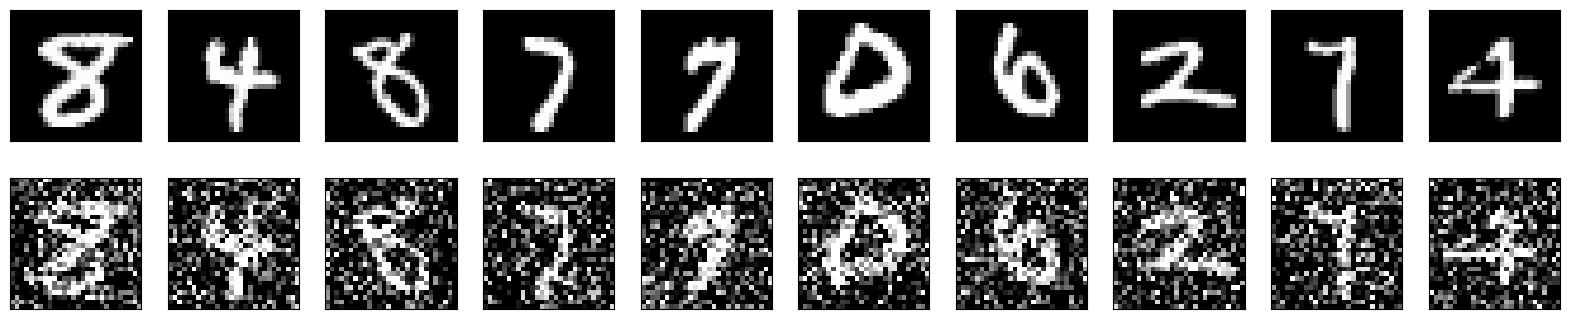

In [32]:
# Display original and noisy images
n = 10 # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray') # Specify the colormap
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display noisy images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray') # Specify the colormap
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [34]:
# Define the autoencoder model
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [35]:
# Reshape the data for convolutional autoencoder
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
x_train_noisy = np.reshape(x_train_noisy, (len(x_train_noisy), 28, 28, 1))
x_test_noisy = np.reshape(x_test_noisy, (len(x_test_noisy), 28, 28, 1))

In [36]:
# train
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128,shuffle=True, validation_data=(x_test_noisy, x_test))
# Denoise test images
denoised_images = autoencoder.predict(x_test_noisy)

Epoch 1/10
438/438 [==============================] - 19s 43ms/step - loss: 0.1697 - val_loss: 0.1195
Epoch 2/10
438/438 [==============================] - 20s 45ms/step - loss: 0.1144 - val_loss: 0.1106
Epoch 3/10
438/438 [==============================] - 20s 45ms/step - loss: 0.1089 - val_loss: 0.1069
Epoch 4/10
438/438 [==============================] - 20s 45ms/step - loss: 0.1056 - val_loss: 0.1048
Epoch 5/10
438/438 [==============================] - 19s 43ms/step - loss: 0.1031 - val_loss: 0.1026
Epoch 6/10
438/438 [==============================] - 18s 40ms/step - loss: 0.1015 - val_loss: 0.1009
Epoch 7/10
438/438 [==============================] - 18s 40ms/step - loss: 0.1002 - val_loss: 0.0998
Epoch 8/10
438/438 [==============================] - 19s 42ms/step - loss: 0.0993 - val_loss: 0.0989
Epoch 9/10
438/438 [==============================] - 18s 41ms/step - loss: 0.0986 - val_loss: 0.0983
Epoch 10/10
438/438 [==============================] - 1s 3ms/step


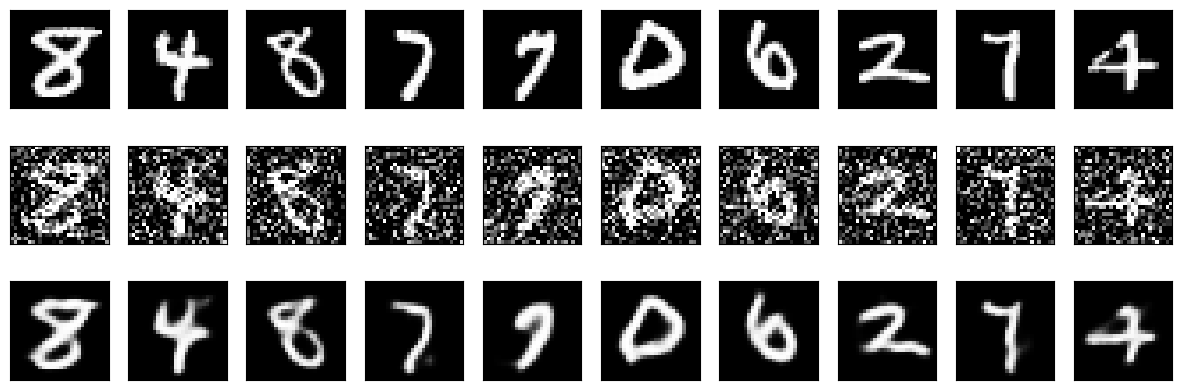

In [37]:
# Display original, noisy, and denoised images
plt.figure(figsize=(15, 5))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()